In [0]:
#(1)ドライブをマウント
#(2)学習済みモデルのあるディレクトリに移動

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive

/content/drive


In [4]:
cd My Drive

/content/drive/My Drive


In [0]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
from PIL import Image
from torchvision import models, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
from torchvision import datasets

In [7]:
!pip install pytorch-lightning

     |████████████████████████████████| 204kB 2.7MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 829kB 37.5MB/s 
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=e7ed4a6337954bce167ba7f94e22373c2878e01b7d012ad4f46e0f51b7cdcfd9
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: tqdm 4.38.0
    Uninstalling tqdm-4.38.0:
      Successfully uninstalled tqdm-4.38.0
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


In [0]:
#モデル読み込み

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
use_pretrained = True  # 学習済みのパラメータを使用
model = models.densenet161(pretrained=use_pretrained).to(device)

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth


In [0]:
#モデルを10クラスに適用

In [0]:
model.classifier = nn.Linear(in_features=2208, out_features=10, bias=True).to(device)

In [10]:
#モデルを読み込む
device = torch.device("cuda")
#model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load("check.pt"))
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
transform_test = transforms.Compose([
    transforms.RandomResizedCrop(224), #サイズ合わせ
    transforms.RandomHorizontalFlip(), 
    #transforms.RandomVerticalFlip(),
    transforms.ToTensor() ,              #型変換(?)
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  #https://teratail.com/questions/234027
    
    ])

In [0]:
#テスト画像読み込み

In [0]:
your_datasets = datasets.ImageFolder(root="images", transform=transform_test) 

In [13]:
your_datasets

Dataset ImageFolder
    Number of datapoints: 1000
    Root location: cholab
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [0]:
#your_datasets[画像番号][0:画像データ,1:ラベル]

In [0]:
#your_datasets[0～99][1]：ラベル0：airplane
#your_datasets[100～199][1]：ラベル1：bird
#your_datasets[200～299][1]：ラベル2：car
#your_datasets[300～399][1]：ラベル3：cat
#your_datasets[400～499][1]：ラベル4：deer
#your_datasets[500～599][1]：ラベル5：dog
#your_datasets[600～699][1]：ラベル6：horse
#your_datasets[700～799][1]：ラベル7：monkey
#your_datasets[800～899][1]：ラベル8：ship
#your_datasets[900～999][1]：ラベル9：truck

class_name = ["airplane","bird","car","cat","deer","dog","horse","monkey","ship","tuck"]

#　※ディレクトリの順番がa～z順になっていない場合は多分ずれるのでラベルに注意して書き換える

In [148]:
your_datasets[0][0].shape

torch.Size([3, 224, 224])

In [149]:
#画像を代入：実行時間が長いため注意
"""
img = []
for ii in range(1000):
  img.append(np.transpose(your_datasets[ii][0],(1,2,0)))
  #img.shape

"""

'\nimg = []\nfor ii in range(1000):\n  img.append(np.transpose(your_datasets[ii][0],(1,2,0)))\n  #img.shape\n\nplt.imshow(img[10])\n'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


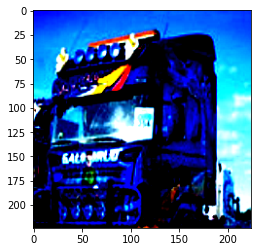

In [144]:
#画像表示
#plt.imshow(img[999])

In [153]:
#ラベル確認
#your_datasets[799][1]

7

In [55]:
#一枚のみ判別する場合
"""
TEST = your_datasets[0][0].unsqueeze(0)
TEST.shape
"""

torch.Size([1, 3, 224, 224])

In [0]:
# 評価モードにする
model = model.eval()

In [173]:
#　※ディレクトリの順番がa～z順になっていない場合は多分ずれるのでif分の中を書き換える
airplane = 0
bird = 0
car = 0
cat =0
deer = 0
dog = 0
horse = 0
monkey = 0
ship = 0
truck = 0
totall = 0

for ii in range(1000):
   TEST = your_datasets[ii][0].unsqueeze(0) 
   TEST = TEST.cuda() 
   y_predict = model.forward(TEST)
   print(ii,  " : ", class_name[y_predict[0].argmax()])

   if y_predict[0].argmax() == your_datasets[ii][1]:
      if 0 <= ii <99:
           airplane+=1
           totall+=1
      if 100 <= ii <199:
           bird+=1
           totall+=1
      if 200 <= ii <299:
           car+=1
           totall+=1
      if 300 <= ii <399:
           cat+=1
           totall+=1
      if 400 <= ii <499:
           deer+=1
           totall+=1
      if 500 <= ii <599:
           dog+=1
           totall+=1
      if 600 <= ii <699:
           horse+=1
           totall+=1
      if 700 <= ii <799:
           monkey+=1
           totall+=1
      if 800 <= ii <899:
           ship+=1
           totall+=1
      if 900 <= ii <999:
           truck+=1
           totall+=1

print("正解数")
print("airplane  ：",airplane)
print("bird      ：",bird)
print("car       ：",car)
print("cat       ：",cat)
print("deer      ：",deer)
print("dog       ：",dog)
print("horse     ：",horse)
print("monkey    ：",monkey)
print("ship      ：",ship)
print("truck     ：",truck)
print("------------------")
print("合計正解数：",totall)
print("正答率    ：",(totall/1000)*100,"%")

0  :  ship
1  :  airplane
2  :  airplane
3  :  airplane
4  :  airplane
5  :  airplane
6  :  airplane
7  :  airplane
8  :  airplane
9  :  airplane
10  :  airplane
11  :  airplane
12  :  airplane
13  :  airplane
14  :  airplane
15  :  airplane
16  :  airplane
17  :  airplane
18  :  airplane
19  :  airplane
20  :  airplane
21  :  airplane
22  :  airplane
23  :  airplane
24  :  airplane
25  :  airplane
26  :  airplane
27  :  airplane
28  :  airplane
29  :  airplane
30  :  airplane
31  :  airplane
32  :  airplane
33  :  airplane
34  :  airplane
35  :  airplane
36  :  airplane
37  :  airplane
38  :  airplane
39  :  airplane
40  :  airplane
41  :  airplane
42  :  airplane
43  :  airplane
44  :  airplane
45  :  airplane
46  :  airplane
47  :  airplane
48  :  airplane
49  :  car
50  :  airplane
51  :  airplane
52  :  airplane
53  :  airplane
54  :  airplane
55  :  airplane
56  :  airplane
57  :  airplane
58  :  airplane
59  :  airplane
60  :  airplane
61  :  airplane
62  :  airplane
63  :  airp